# Data Analyst Assignment
### Part 1. Exploratory data analysis
Perform an exploratory data analysis on the given dataset and share your findings.

### Part 2. Metric calculation
What is the average duration between the 1st trip and the 2nd trip of customers? Note: Consider only the customers who have done 2 or more trips.

### Part 3. Model building
Build a model to predict trip_fare using travel_distance and travel_time. Measure the accuracy of the model and use the model to predict trip_fare for a trip with travel_distance of 3.5 kms and travel_time of 15 minutes.

### Part 4. Top Hex clusters
Top 5 pairs of hex (resolution=8) clusters where most of the trips happened? You can refer to the library listed below to get hexid for a given latitude and longitude.

https://github.com/uber/h3-py

##### Expected output

Rank	Hex pair (source_hexid, destination_hexid)	Total trips
1	883c8e4159fffff to 88754e6499fffff	34
2	883db66b55fffff to 883c8e4159fffff	28

##### Dataset

Serial No.	Column names	Description
- 1	trip_id	Unique identifier for customer
- 2	customer_id	Unique identifier for customer
- 3	timestamp	Time stamp of the trip in Epoch format
- 4	pick_lat	Latitude of the pickup location
- 5	pick_lng	Longitude of the pickup location
- 6	drop_lat	Latitude of the drop location
- 7	drop_lng	Longitude of the drop location
- 8	travel_distance	Distance of trip measured in KMs
- 9	travel_time	Duration of the trip measured in Minutes
- 10	trip_fare	Trip fare calculated in Rupees


# Part 1. Exploratory data analysis
Perform an exploratory data analysis on the given dataset and share your findings.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('dataanalytics.csv')
df.head()

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
0,ID001,CUST_001,1546709270211,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37
1,ID002,CUST_002,1546709309524,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119
2,ID003,CUST_003,1546709331857,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27
3,ID004,CUST_004,1546709358403,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121
4,ID005,CUST_005,1546709386884,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44587 entries, 0 to 44586
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   trip_id          44587 non-null  object 
 1   customer_id      44587 non-null  object 
 2   timestamp        44587 non-null  int64  
 3   pick_lat         44587 non-null  float64
 4   pick_lng         44587 non-null  float64
 5   drop_lat         44587 non-null  float64
 6   drop_lng         44587 non-null  float64
 7   travel_distance  44587 non-null  float64
 8   travel_time      44587 non-null  float64
 9   trip_fare        44587 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 3.4+ MB


In [4]:
df.dtypes # Check the data types of the columns

trip_id             object
customer_id         object
timestamp            int64
pick_lat           float64
pick_lng           float64
drop_lat           float64
drop_lng           float64
travel_distance    float64
travel_time        float64
trip_fare            int64
dtype: object

In [5]:
df.shape # Cecking Dimension

(44587, 10)

In [6]:
df.isnull().sum() # Check the missing values in the dataframe

trip_id            0
customer_id        0
timestamp          0
pick_lat           0
pick_lng           0
drop_lat           0
drop_lng           0
travel_distance    0
travel_time        0
trip_fare          0
dtype: int64

In [7]:
df.describe() # Check the summary statistics of the dataframe

,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
count,4.458700e+04,44587.000000,44587.000000,44587.000000,44587.000000,44587.000000,44587.000000,44587.000000
mean,1.546632e+12,17.427919,78.435542,17.427891,78.434897,5.094359,15.819835,53.872833
std,1.518684e+08,0.030049,0.053333,0.037722,0.054965,3.365008,23.462865,33.430462
min,1.546368e+12,17.330339,78.308258,12.921696,77.548103,-1.000000,0.022750,20.000000
25%,1.546503e+12,17.405327,78.386562,17.405660,78.385010,2.744500,8.428525,36.000000
50%,1.546611e+12,17.432136,78.438866,17.431213,78.438164,4.299000,13.126250,46.000000
75%,1.546772e+12,17.446777,78.480839,17.446907,78.480255,6.679500,20.111167,60.000000
max,1.546886e+12,17.529791,78.600647,17.736155,78.634804,52.801000,4134.388700,1670.000000


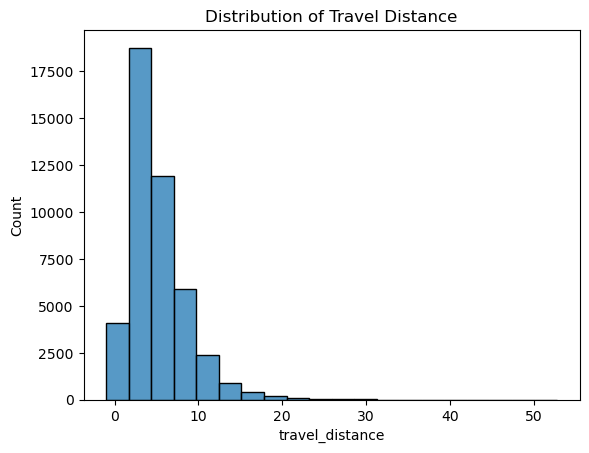

In [8]:
sns.histplot(data=df, x='travel_distance', bins=20)
plt.title('Distribution of Travel Distance')
plt.show()

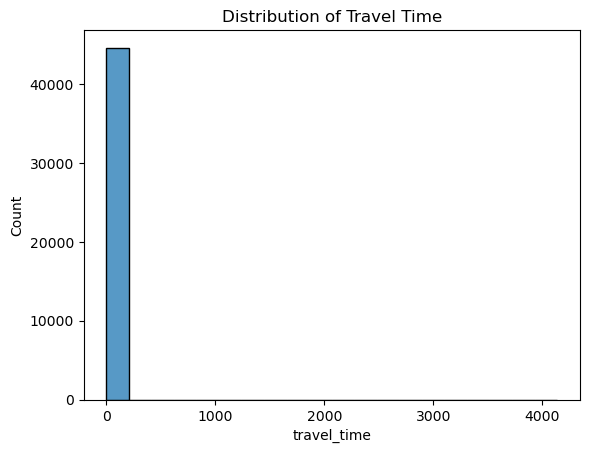

In [9]:
sns.histplot(data=df, x='travel_time', bins=20)
plt.title('Distribution of Travel Time')
plt.show()

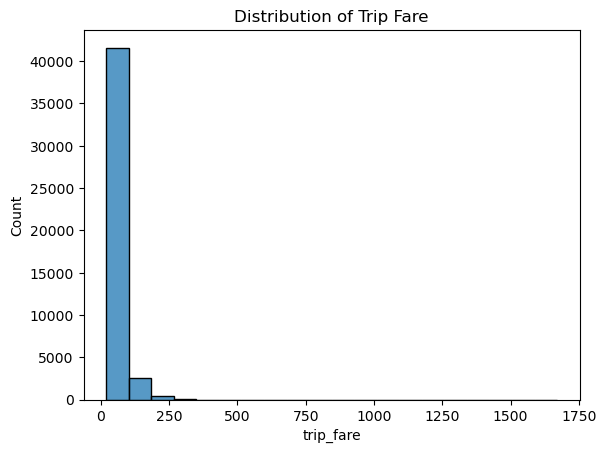

In [10]:
sns.histplot(data=df, x='trip_fare', bins=20)
plt.title('Distribution of Trip Fare')
plt.show()

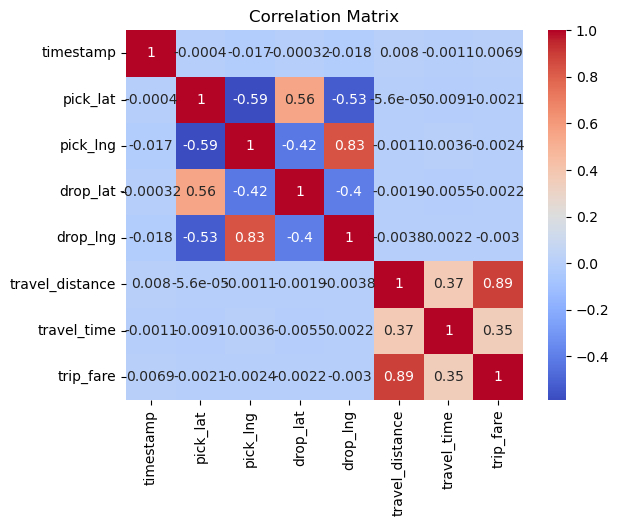

In [11]:
# Check the correlation between the numerical columns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

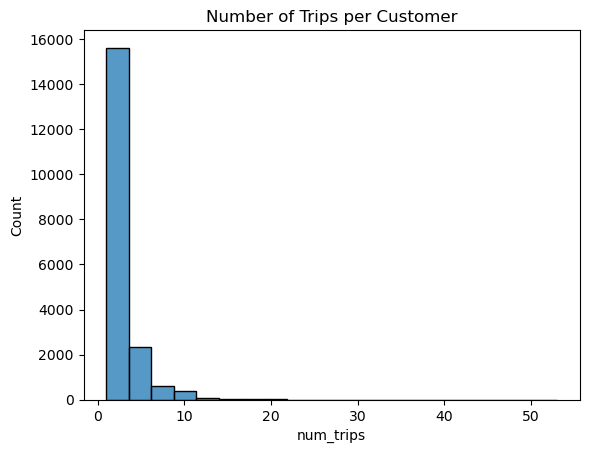

In [12]:
trips_per_customer = df.groupby('customer_id')['trip_id'].count().reset_index()
trips_per_customer.rename(columns={'trip_id': 'num_trips'}, inplace=True)

sns.histplot(data=trips_per_customer, x='num_trips', bins=20)
plt.title('Number of Trips per Customer')
plt.show()

In [13]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
0,ID001,CUST_001,2019-01-05 17:27:50.211,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37
1,ID002,CUST_002,2019-01-05 17:28:29.524,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119
2,ID003,CUST_003,2019-01-05 17:28:51.857,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27
3,ID004,CUST_004,2019-01-05 17:29:18.403,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121
4,ID005,CUST_005,2019-01-05 17:29:46.884,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58
...,...,...,...,...,...,...,...,...,...,...
44582,ID44583,CUST_19137,2019-01-03 16:04:51.044,17.443661,78.391968,17.451042,78.371658,5.665,12.573883,55
44583,ID44584,CUST_19138,2019-01-03 16:05:05.869,17.439289,78.396118,17.449976,78.389160,9.292,17.937717,76
44584,ID44585,CUST_5061,2019-01-03 16:05:22.103,17.363689,78.535194,17.374418,78.529823,5.485,17.403850,55
44585,ID44586,CUST_19139,2019-01-03 16:05:36.429,17.401539,78.570076,17.416904,78.591362,2.326,14.236767,35


# Part 2. Metric calculation
What is the average duration between the 1st trip and the 2nd trip of customers? Note: Consider only the customers who have done 2 or more trips.

In [14]:
# Create a new dataframe with customers who have done 2 or more trips
multi_trip_df = df.groupby('customer_id').filter(lambda x: len(x) >= 2)

In [15]:
# Sort the dataframe by customer_id and timestamp
multi_trip_df = multi_trip_df.sort_values(by=['customer_id', 'timestamp'])

In [16]:
# Create a new column to calculate the duration between trips
multi_trip_df['duration'] = multi_trip_df.groupby('customer_id')['timestamp'].diff()

In [17]:
# Calculate the average duration between the 1st trip and the 2nd trip of customers
avg_duration = multi_trip_df.groupby('customer_id')['duration'].nth(1).mean()

In [18]:
print(avg_duration)

1 days 00:47:09.691580722


# Part 3. Model building
Build a model to predict trip_fare using travel_distance and travel_time. Measure the accuracy of the model and use the model to predict trip_fare for a trip with travel_distance of 3.5 kms and travel_time of 15 minutes.


In [19]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Create the feature matrix X and target vector y
X = df[['travel_distance', 'travel_time']]
y = df['trip_fare']

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
lr = LinearRegression() # linear regression

In [23]:
lr.fit(X_train, y_train) # Fit the model using the training sets

LinearRegression()

In [24]:
y_pred = lr.predict(X_test) #Make predictions using the testing set

In [25]:
# Calculate the mean squared error and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [26]:
# Print the metrics
print("Mean Squared Error:", mse)
print("R-squared value:", r2)

Mean Squared Error: 55.21723132781467
R-squared value: 0.9436244424795224


In [27]:
# Use the model to predict trip_fare for a trip with travel_distance of 3.5 kms and travel_time of 15 minutes
new_data = np.array([[3.5, 15]])
prediction = lr.predict(new_data)
print("Predicted trip fare:", prediction)

Predicted trip fare: [39.9177697]


C:\Users\Milind\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Part 4. Top Hex clusters
Top 5 pairs of hex (resolution=8) clusters where most of the trips happened? You can refer to the library listed below to get hexid for a given latitude and longitude.

In [28]:
# Import necessary libraries
import h3

In [29]:
# Create a new column to store the hexid for pick_lat and pick_lng
df['pick_hexid'] = df.apply(lambda row: h3.geo_to_h3(row['pick_lat'], row['pick_lng'], 8), axis=1)

In [30]:
# Create a new column to store the hexid for drop_lat and drop_lng
df['drop_hexid'] = df.apply(lambda row: h3.geo_to_h3(row['drop_lat'], row['drop_lng'], 8), axis=1)

In [31]:
# Count the number of trips for each hexid and store in a dictionary
hexid_counts = {}
for hexid in df['pick_hexid'].unique():
     hexid_counts[hexid] = df[df['pick_hexid'] == hexid].shape[0]
for hexid in df['drop_hexid'].unique():
    if hexid in hexid_counts:
        hexid_counts[hexid] += df[df['drop_hexid'] == hexid].shape[0]
    else:
        hexid_counts[hexid] = df[df['drop_hexid'] == hexid].shape[0]

In [32]:
# Get the top 5 hexid pairs with the highest trip counts
top_hexid_pairs = sorted(list(hexid_counts.items()), key=lambda x: x[1], reverse=True)[:5]
print(top_hexid_pairs)

[('8860a259b9fffff', 2229), ('8860a25995fffff', 2128), ('8860a259bbfffff', 1782), ('8860a24a6dfffff', 1545), ('8860a24a65fffff', 1432)]
